In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from biopsykit.classification.model_selection import SklearnPipelinePermuter

from pepbench.io import compute_abs_error

from pepbench.plotting.results import boxplot_algorithm_performance, _plot_helper_algorithm_performance

from fau_colors import cmaps, register_fausans_font

In [2]:
#register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="notebook", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.sans-serif"] = "FAUSans Office"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [3]:
data_path = Path("../../../results/data/q-peak")
model_path = Path("../../../results/models/q-peak")
output_image_path = Path("Images/Paper")

In [6]:
merged_ml_results_q_peak_metrics = pd.read_csv(data_path.joinpath("merged_ml_results_q_peak_error_metrics.csv"), index_col=[0,1,2,3])
merged_ml_results_q_peak_metrics

forounzafar2018_error  \
participant condition phase         heartbeat_id_reference                          
GDN0005     Dummy     HoldingBreath 0                                       -16.0   
                                    1                                       -18.0   
                                    3                                       -14.0   
                                    4                                       -16.0   
                                    5                                       -14.0   
...                                                                           ...   
VP_032      tsst      Talk          39                                      -11.0   
                                    40                                      -12.0   
                                    41                                      -10.0   
                                    42                                      -11.0   
                                    43                                      -10.0   

                                                            forounzafar2018_rel_error  \
participant condition phase         heartbeat_id_reference                              
GDN0005     Dummy     HoldingBreath 0                                       -0.061538   
                                    1                                       -0.069231   
                                    3                                       -0.063063   
                                    4                                       -0.072727   
                                    5                                       -0.061404   
...                                                                               ...   
VP_032      tsst      Talk          39                                      -0.063953   
                                    40                                      -0.066298   
                                    41                                      -0.050000   
                                    42                                      -0.051887   
                                    43                                      -0.048309   

                                                            forounzafar2018_abs_error  \
participant condition phase         heartbeat_id_reference                              
GDN0005     Dummy     HoldingBreath 0                                            16.0   
                                    1                                            18.0   
                                    3                                            14.0   
                                    4                                            16.0   
                                    5                                            14.0   
...                                                                               ...   
VP_032      tsst      Talk          39                                           11.0   
                                    40                                           12.0   
                                    41                                           10.0   
                                    42                                           11.0   
                                    43                                           10.0   

                                                            forounzafar2018_abs_rel_error  \
participant condition phase         heartbeat_id_reference                                  
GDN0005     Dummy     HoldingBreath 0                                            0.061538   
                                    1                                            0.069231   
                                    3                                            0.063063   
                                    4                                            0.072727   
                                    5                                           

In [5]:
merged_ml_results_q_peak = pd.read_csv(data_path.joinpath("merged_ml_results_q_peak.csv"), index_col=[0,1,2,3]).drop(columns=['level_0'])
merged_ml_results_q_peak

q_peak_sample_reference  \
participant condition phase         heartbeat_id_reference                            
GDN0005     Dummy     HoldingBreath 0                                         260.0   
                                    1                                         260.0   
                                    3                                         222.0   
                                    4                                         220.0   
                                    5                                         228.0   
...                                                                             ...   
VP_032      tsst      Talk          39                                        172.0   
                                    40                                        181.0   
                                    41                                        200.0   
                                    42                                        212.0   
                                    43                                        207.0   

                                                            rr_interval_ms_estimated  \
participant condition phase         heartbeat_id_reference                             
GDN0005     Dummy     HoldingBreath 0                                          850.0   
                                    1                                          778.0   
                                    3                                          746.0   
                                    4                                          766.0   
                                    5                                          790.0   
...                                                                              ...   
VP_032      tsst      Talk          39                                         619.0   
                                    40                                         680.0   
                                    41                                         719.0   
                                    42                                         698.0   
                                    43                                         689.0   

                                                            forounzafar2018  \
participant condition phase         heartbeat_id_reference                    
GDN0005     Dummy     HoldingBreath 0                                 276.0   
                                    1                                 278.0   
                                    3                                 236.0   
                                    4                                 236.0   
                                    5                                 242.0   
...                                                                     ...   
VP_032      tsst      Talk          39                                183.0   
                                    40                                193.0   
                                    41                                210.0   
                                    42                                223.0   
                                    43                                217.0   

                                                            martinez2004  \
participant condition phase         heartbeat_id_reference                 
GDN0005     Dummy     HoldingBreath 0                              262.0   
                                    1                              262.0   
                                    3                              224.0   
                                    4                              222.0   
                                    5                              230.0   
...                                                                  ...   
VP_032      tsst      Talk          39                             173.0   
                                    40                             182.

In [13]:
list(merged_ml_results_q_peak_metrics.columns)

['forounzafar2018_error',
 'forounzafar2018_rel_error',
 'forounzafar2018_abs_error',
 'forounzafar2018_abs_rel_error',
 'martinez2004_error',
 'martinez2004_rel_error',
 'martinez2004_abs_error',
 'martinez2004_abs_rel_error',
 'vanlien2013-32-ms_error',
 'vanlien2013-32-ms_rel_error',
 'vanlien2013-32-ms_abs_error',
 'vanlien2013-32-ms_abs_rel_error',
 'vanlien2013-34-ms_error',
 'vanlien2013-34-ms_rel_error',
 'vanlien2013-34-ms_abs_error',
 'vanlien2013-34-ms_abs_rel_error',
 'vanlien2013-36-ms_error',
 'vanlien2013-36-ms_rel_error',
 'vanlien2013-36-ms_abs_error',
 'vanlien2013-36-ms_abs_rel_error',
 'vanlien2013-38-ms_error',
 'vanlien2013-38-ms_rel_error',
 'vanlien2013-38-ms_abs_error',
 'vanlien2013-38-ms_abs_rel_error',
 'vanlien2013-40-ms_error',
 'vanlien2013-40-ms_rel_error',
 'vanlien2013-40-ms_abs_error',
 'vanlien2013-40-ms_abs_rel_error',
 'vanlien2013-42-ms_error',
 'vanlien2013-42-ms_rel_error',
 'vanlien2013-42-ms_abs_error',
 'vanlien2013-42-ms_abs_rel_error',
 'SS

### Best performing ML-Estimators
- ('StandardScaler', 'SelectKBest', 'SVR') Data: RR-Interval-Median-Imputed
- ('MinMaxScaler', 'None', 'RandomForestRegressor') Data: RR-Interval-Include-Nan
- ('StandardScaler', 'SelectKBest', 'RandomForestRegressor') Data: RR-Interval-Median-Imputed

In [14]:
algo_dict = {
    "martinez2004_abs_error": "Mar04",
    "SS_KBest_SVR_RR-Interval-Median-Imputed_abs_error": "SVR RR-Interval Median",
    "MinMax_None_RFR_RR-Interval-Include-Nan_abs_error": "RFR RR-Interval NaN",
    "SS_KBest_RFR_RR-Interval-Median-Imputed_abs_error": "RFR RR-Interval-Median-Imputed",
}

In [17]:
plot_data = merged_ml_results_q_peak_metrics[["martinez2004_abs_error", "SS_KBest_SVR_RR-Interval-Median-Imputed_abs_error", "MinMax_None_RFR_RR-Interval-Include-Nan_abs_error", "SS_KBest_RFR_RR-Interval-Median-Imputed_abs_error"]]
plot_data = plot_data.rename(columns=algo_dict)
plot_data

Mar04  \
participant condition phase         heartbeat_id_reference          
GDN0005     Dummy     HoldingBreath 0                         2.0   
                                    1                         2.0   
                                    3                         2.0   
                                    4                         2.0   
                                    5                         2.0   
...                                                           ...   
VP_032      tsst      Talk          39                        1.0   
                                    40                        1.0   
                                    41                        1.0   
                                    42                        1.0   
                                    43                        NaN   

                                                            SVR RR-Interval Median  \
participant condition phase         heartbeat_id_reference                           
GDN0005     Dummy     HoldingBreath 0                                     2.898580   
                                    1                                     3.885560   
                                    3                                     2.888007   
                                    4                                     3.940827   
                                    5                                     2.927496   
...                                                                            ...   
VP_032      tsst      Talk          39                                    0.746335   
                                    40                                    0.937809   
                                    41                                    0.343957   
                                    42                                    0.351047   
                                    43                                    0.155710   

                                                            RFR RR-Interval NaN  \
participant condition phase         heartbeat_id_reference                        
GDN0005     Dummy     HoldingBreath 0                                  3.531592   
                                    1                                  5.592537   
                                    3                                  2.325138   
                                    4                                  3.105291   
                                    5                                  2.820366   
...                                                                         ...   
VP_032      tsst      Talk          39                                 0.136000   
                                    40                                 0.416000   
                                    41                                 0.620000   
                                    42                                 2.808000   
                                    43                                 0.428000   

                                                            RFR RR-Interval-Median-Imputed  
participant condition phase         heartbeat_id_reference                                  
GDN0005     Dummy     HoldingBreath 0                                             3.506055  
                                    1                                             4.212666  
                                    3                                             2.426197  
                                    4                                             2.956048  
                                    5                                             2.722361  
...                                                                                    ...  
VP_032      tsst      Talk          39                                            0.090604  
                                    40                                            0.714245  
                                 

In [18]:
empkins_data = plot_data.loc[plot_data.index.get_level_values(level="condition").isin(['ftsst', 'tsst'])]
guardian_data = plot_data.xs(key="Dummy", level="condition")

Boxplot of the best performing traditional- + ml-estimators

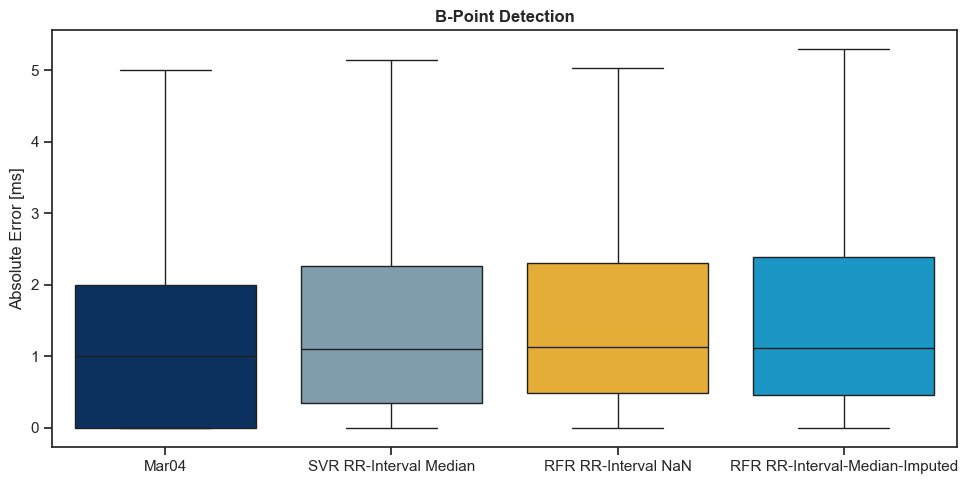

In [ ]:
sns.boxplot(plot_data, showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.title("Q-Peak Detection", fontdict={"weight": "bold"})
plt.tight_layout()

Boxplot of the best performing traditional- + ml-estimators by Empkins Dataset

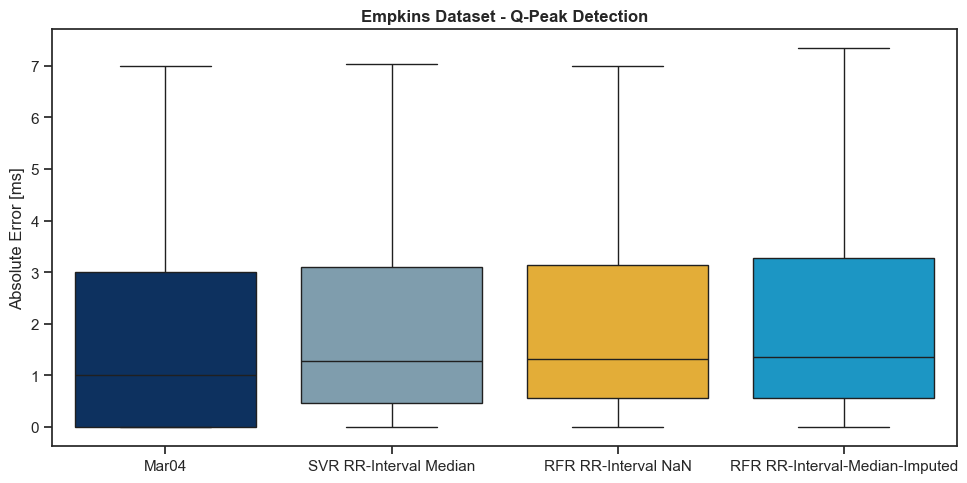

In [22]:
sns.boxplot(empkins_data, showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.title("Empkins Dataset - Q-Peak Detection", fontdict={"weight": "bold"})
plt.tight_layout()

Boxplot of the best performing traditional- + ml-estimators by Guardian Dataset

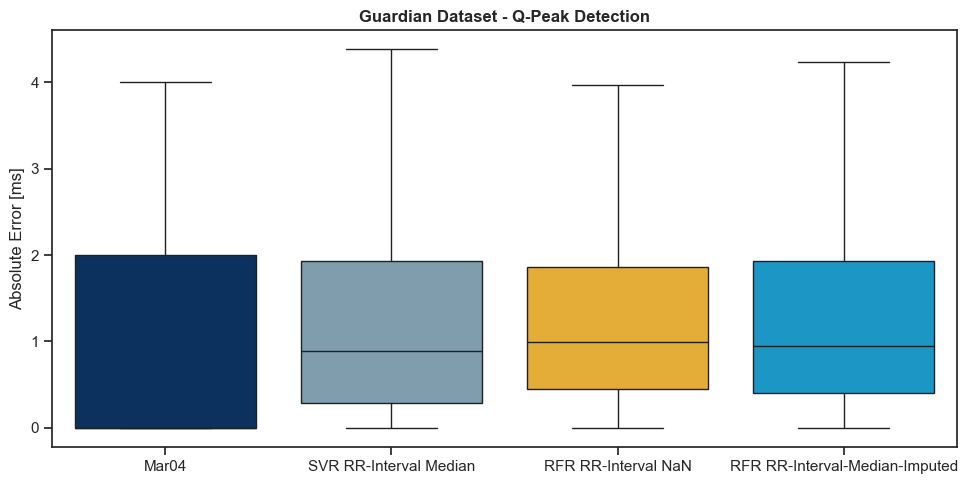

In [21]:
sns.boxplot(guardian_data, showfliers=False)
plt.ylabel("Absolute Error [ms]")
plt.title("Guardian Dataset - Q-Peak Detection", fontdict={"weight": "bold"})
plt.tight_layout()

Empkins

<Axes: xlabel='condition', ylabel='SVR RR-Interval Median'>

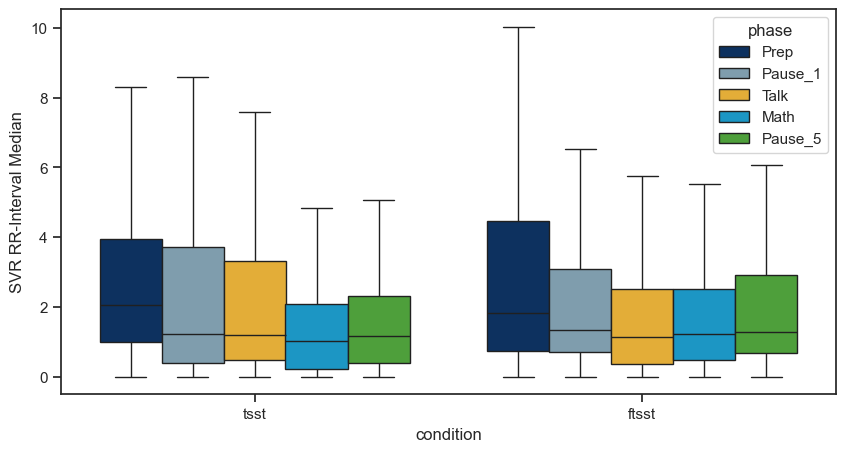

In [23]:
sns.boxplot(empkins_data, x="condition", y="SVR RR-Interval Median", hue="phase", order=["tsst", "ftsst"], hue_order=["Prep", "Pause_1", "Talk", "Math", "Pause_5"], showfliers=False)

Guardian

<Axes: xlabel='phase', ylabel='SVR RR-Interval Median'>

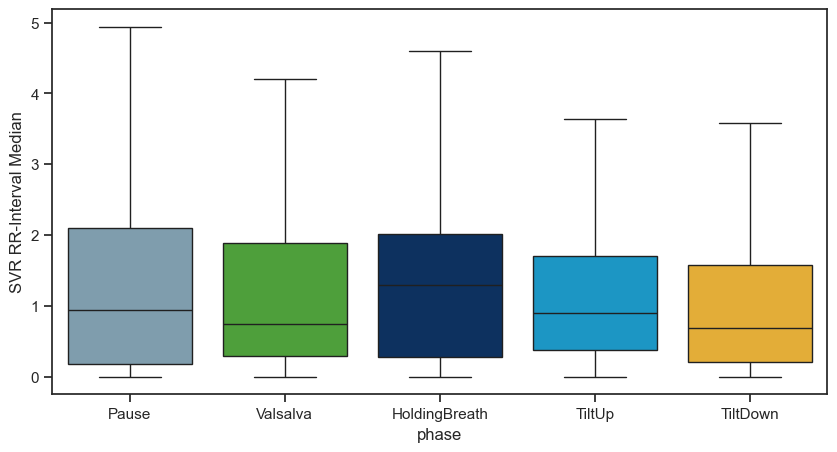

In [24]:
sns.boxplot(guardian_data, x="phase", y="SVR RR-Interval Median", hue="phase", order=["Pause", "Valsalva", "HoldingBreath", "TiltUp", "TiltDown"], showfliers=False, palette=palette[:-1], legend=False)

Residualplots of the best performing traditional- + ml-estimators against the B-Point reference

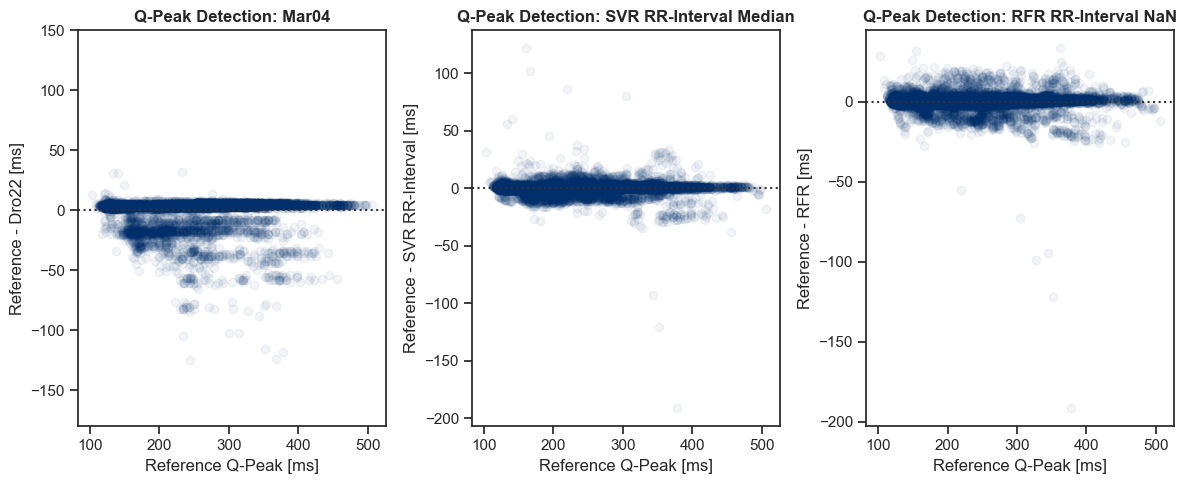

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(12,5))
sns.residplot(merged_ml_results_q_peak, x="q_peak_sample_reference", y="martinez2004", ax=axs[0], scatter_kws={"alpha": 0.05})
axs[0].set_ylabel("Reference - Dro22 [ms]")
axs[0].set_xlabel("Reference Q-Peak [ms]")
axs[0].set_ylim(-180, 150)
axs[0].set_title("Q-Peak Detection: Mar04", fontdict={"weight": "bold"})
sns.residplot(merged_ml_results_q_peak, x="q_peak_sample_reference", y="SS_KBest_SVR_RR-Interval-Median-Imputed", ax=axs[1], scatter_kws={"alpha": 0.05})
axs[1].set_ylabel("Reference - SVR RR-Interval [ms]")
axs[1].set_xlabel("Reference Q-Peak [ms]")
axs[1].set_title("Q-Peak Detection: SVR RR-Interval Median", fontdict={"weight": "bold"})
sns.residplot(merged_ml_results_q_peak, x ="q_peak_sample_reference", y="MinMax_None_RFR_RR-Interval-Include-Nan", ax=axs[2], scatter_kws={"alpha": 0.05})
axs[2].set_ylabel("Reference - RFR [ms]")
axs[2].set_xlabel("Reference Q-Peak [ms]")
axs[2].set_title("Q-Peak Detection: RFR RR-Interval NaN", fontdict={"weight": "bold"})
fig.tight_layout()